# Import libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import warnings

warnings.simplefilter(action='ignore')
%matplotlib inline

# Uploading datasets

In [38]:
df = pd.read_csv('data-sets/Customer-survey-data.csv')
df

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


# Preparing data for analysis

## Renaming the columns

In [40]:
df = df.rename(columns={'Customer': 'customer_id',
       'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'delivery_score',
       'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'food_score',
       'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'time_score',
       'Was your order accurate? Please respond yes or no.': 'correct_order'})
df

,customer_id,delivery_score,food_score,time_score,correct_order
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


## Replacing the values

In [41]:
df['correct_order'] = df['correct_order'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
df

,customer_id,delivery_score,food_score,time_score,correct_order
0,1,5.0,3.0,4.0,1.0
1,2,3.0,4.0,3.0,1.0
2,3,4.0,5.0,2.0,1.0
3,4,5.0,3.0,4.0,1.0
4,5,2.0,5.0,1.0,1.0
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,1.0
10612,10613,3.0,3.0,3.0,1.0
10613,10614,5.0,3.0,3.0,1.0
10614,10615,3.0,3.0,3.0,1.0


## Check the values for missing

In [42]:
df.isna().sum()

customer_id         0
delivery_score    418
food_score        252
time_score        239
correct_order     660
dtype: int64

To save the distribution, let's fill in the missing values with median values

In [43]:
for col in df:
    df[col] = df[col].fillna(df[col].median())
df.isna().sum()

customer_id       0
delivery_score    0
food_score        0
time_score        0
correct_order     0
dtype: int64

Done

## Check the data types

In [44]:
df.dtypes

customer_id         int64
delivery_score    float64
food_score        float64
time_score        float64
correct_order     float64
dtype: object

It's all right.

## General information

In [45]:
df.describe()

,customer_id,delivery_score,food_score,time_score,correct_order
count,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000
mean,5308.500000,3.312453,3.324133,3.315656,0.732008
std,3064.719563,1.392957,1.398730,1.393790,0.442934
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2654.750000,2.000000,2.000000,2.000000,0.000000
50%,5308.500000,3.000000,3.000000,3.000000,1.000000
75%,7962.250000,5.000000,5.000000,5.000000,1.000000
max,10616.000000,5.000000,5.000000,5.000000,1.000000


# Analysis

## Distribution of scores

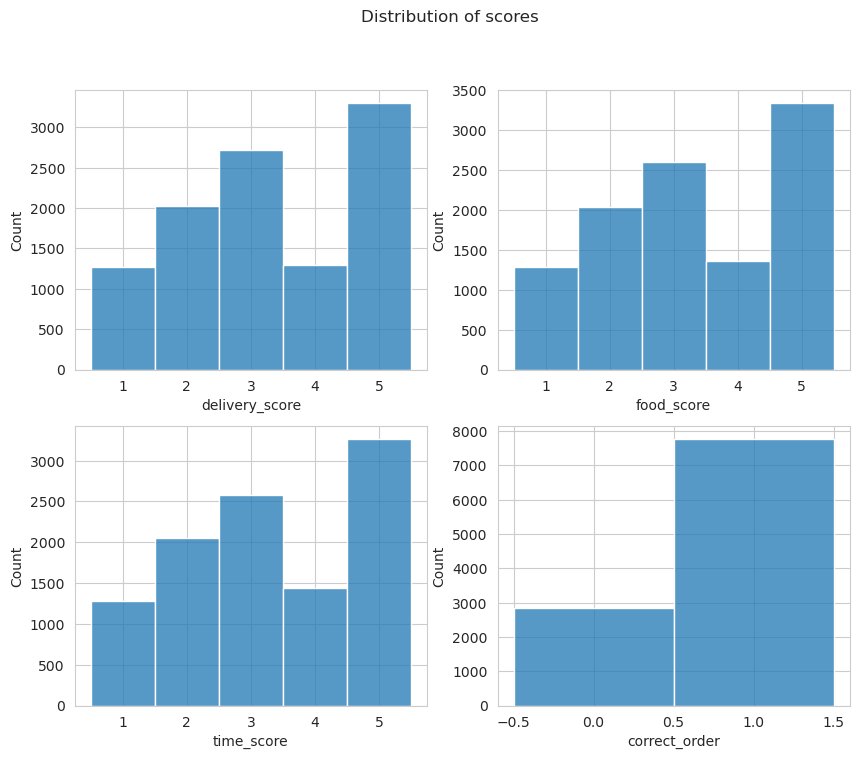

In [46]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df['delivery_score'], discrete=True, ax=ax[0, 0])
sns.histplot(data=df['food_score'], discrete=True, ax=ax[0, 1])
sns.histplot(data=df['time_score'], discrete=True, ax=ax[1, 0])
sns.histplot(data=df['correct_order'], discrete=True, ax=ax[1, 1])

plt.suptitle('Distribution of scores')
plt.show()

The distribution of the 3 grades is very similar, with the majority of grades being 5. Most of them received the correct orders, we can see on the 4th graph